In [2]:
!pip install scikit-learn-extra

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
import pandas as pd
%matplotlib inline

In [4]:
final = pd.read_csv('final.csv',encoding='UTF-8')
final

,Unnamed: 0,시군구,읍면동,address,area,traffic,traffic/area,avg_temp,max_temp,t_dust,dust_airkorea,dust_naver,f_pop,f_pop/area,p_total,young_old,yo_ratio,young_old/area
0,22,마산합포구,현동,마산합포구 현동,1950.294,8201,4.205007,24.724592,35.099998,NaN,NaN,23,82917,42.515128,14111,2417,0.171285,1.239300
1,29,마산합포구,진전면,마산합포구 진전면,7846.994,4370,0.556901,24.234239,34.000000,NaN,NaN,23,798,0.101695,3900,664,0.170256,0.084618
2,4,의창구,북면,의창구 북면,7380.317,9540,1.292627,25.002491,37.500000,NaN,NaN,7,234774,31.810829,"43,445",7382,0.169916,1.000228
3,50,진해구,웅천동,진해구 웅천동,2888.601,14276,4.942185,24.528216,33.599998,NaN,NaN,21,54609,18.904999,"12,985",2205,0.169811,0.763345
4,44,진해구,풍호동,진해구 풍호동,813.615,11057,13.589966,24.548234,33.599998,13.400000,NaN,23,139136,171.009630,"25,822",3865,0.149679,4.750404
5,47,진해구,덕산동,진해구 덕산동,279.267,8179,29.287384,24.548234,33.599998,15.100000,NaN,23,95594,342.303244,"10,139",1378,0.135911,4.934346
6,25,마산합포구,진동면,마산합포구 진동면,3262.075,6943,2.128400,24.301857,34.000000,NaN,NaN,23,40333,12.364216,12174,1617,0.132824,0.495697
7,48,진해구,자은동,진해구 자은동,535.816,19137,35.715619,24.548234,33.599998,13.950000,NaN,23,63571,118.643340,"21,342",2807,0.131525,5.238739
8,15,마산합포구,월영동,마산합포구 월영동,272.345,9509,34.915273,25.162591,34.900002,20.260000,27.22103,23,334519,1228.291322,42000,5494,0.130810,20.172942
9,43,진해구,충무동,진해구 충무동,1833.321,26559,14.486825,24.548234,33.599998,43.610000,NaN,3,168068,91.674071,"16,947",2216,0.130761,1.208735


In [5]:
df1 = final.loc[:, ['traffic/area', 'max_temp', 'dust_naver', 'f_pop/area', 'young_old/area']]
df1.head()



,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,4.205007,35.099998,23,42.515128,1.239300
1,0.556901,34.000000,23,0.101695,0.084618
2,1.292627,37.500000,7,31.810829,1.000228
3,4.942185,33.599998,21,18.904999,0.763345
4,13.589966,33.599998,23,171.009630,4.750404


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_MinMax_1 = scaler.fit_transform(df1)


In [7]:
from sklearn.preprocessing import StandardScaler
Standar = StandardScaler()
scaled_StandardScaler_1 = Standar.fit_transform(df1)


In [8]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(df1))
scaled_robustScaled_1 = robustScaler.transform(df1)


RobustScaler()


In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [10]:
final

,Unnamed: 0,시군구,읍면동,address,area,traffic,traffic/area,avg_temp,max_temp,t_dust,dust_airkorea,dust_naver,f_pop,f_pop/area,p_total,young_old,yo_ratio,young_old/area
0,22,마산합포구,현동,마산합포구 현동,1950.294,8201,4.205007,24.724592,35.099998,NaN,NaN,23,82917,42.515128,14111,2417,0.171285,1.239300
1,29,마산합포구,진전면,마산합포구 진전면,7846.994,4370,0.556901,24.234239,34.000000,NaN,NaN,23,798,0.101695,3900,664,0.170256,0.084618
2,4,의창구,북면,의창구 북면,7380.317,9540,1.292627,25.002491,37.500000,NaN,NaN,7,234774,31.810829,"43,445",7382,0.169916,1.000228
3,50,진해구,웅천동,진해구 웅천동,2888.601,14276,4.942185,24.528216,33.599998,NaN,NaN,21,54609,18.904999,"12,985",2205,0.169811,0.763345
4,44,진해구,풍호동,진해구 풍호동,813.615,11057,13.589966,24.548234,33.599998,13.400000,NaN,23,139136,171.009630,"25,822",3865,0.149679,4.750404
5,47,진해구,덕산동,진해구 덕산동,279.267,8179,29.287384,24.548234,33.599998,15.100000,NaN,23,95594,342.303244,"10,139",1378,0.135911,4.934346
6,25,마산합포구,진동면,마산합포구 진동면,3262.075,6943,2.128400,24.301857,34.000000,NaN,NaN,23,40333,12.364216,12174,1617,0.132824,0.495697
7,48,진해구,자은동,진해구 자은동,535.816,19137,35.715619,24.548234,33.599998,13.950000,NaN,23,63571,118.643340,"21,342",2807,0.131525,5.238739
8,15,마산합포구,월영동,마산합포구 월영동,272.345,9509,34.915273,25.162591,34.900002,20.260000,27.22103,23,334519,1228.291322,42000,5494,0.130810,20.172942
9,43,진해구,충무동,진해구 충무동,1833.321,26559,14.486825,24.548234,33.599998,43.610000,NaN,3,168068,91.674071,"16,947",2216,0.130761,1.208735


In [13]:
df_MinMax_1 = pd.DataFrame(scaled_MinMax_1)
df_MinMax_1.columns = df1.columns
df_MinMax_1.head()


,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,0.015736,0.52,0.954545,0.014457,0.052534
1,0.000000,0.30,0.954545,0.000000,0.000000
2,0.003173,1.00,0.227273,0.010808,0.041657
3,0.018915,0.22,0.863636,0.006409,0.030880
4,0.056217,0.22,0.954545,0.058255,0.212278


In [14]:
df_Standard_1 = pd.DataFrame(scaled_StandardScaler_1)
df_Standard_1.columns = df1.columns
df_Standard_1.head()

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,-0.851137,0.017316,0.952794,-0.837322,-0.803678
1,-0.915072,-0.855818,0.952794,-0.912962,-0.997364
2,-0.902178,1.922342,-1.376259,-0.856412,-0.843780
3,-0.838218,-1.173324,0.661663,-0.879428,-0.883515
4,-0.686662,-1.173324,0.952794,-0.608165,-0.214726


In [15]:
df_robustScaled_1 = pd.DataFrame(scaled_robustScaled_1)
df_robustScaled_1.columns = df1.columns
df_robustScaled_1.head()

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,-0.330194,0.078430,0.166667,-0.324537,-0.427390
1,-0.378219,-0.352942,0.166667,-0.377773,-0.567944
2,-0.368534,1.019606,-1.166667,-0.337973,-0.456491
3,-0.320490,-0.509805,0.000000,-0.354172,-0.485326
4,-0.206647,-0.509805,0.166667,-0.163258,0.000000


In [16]:
import numpy as np
from sklearn import mixture

In [17]:

rng = np.random.RandomState(seed=1)
X = np.concatenate([rng.normal(-1, 1.5, 350),
 rng.normal(0, 1, 500),
 rng.normal(3, 0.5, 150)]).reshape(-1, 1)
# Fit models with 1-10 components
k_arr = np.arange(10) + 1
models = [
 GaussianMixture(n_components=k).fit(X)
 for k in k_arr
]


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
df_MinMax_1

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,0.015736,0.52,0.954545,0.014457,0.052534
1,0.000000,0.30,0.954545,0.000000,0.000000
2,0.003173,1.00,0.227273,0.010808,0.041657
3,0.018915,0.22,0.863636,0.006409,0.030880
4,0.056217,0.22,0.954545,0.058255,0.212278
5,0.123926,0.22,0.954545,0.116641,0.220646
6,0.006778,0.30,0.954545,0.004180,0.018703
7,0.151653,0.22,0.954545,0.040406,0.234495
8,0.148201,0.48,0.954545,0.418635,0.913951
9,0.060085,0.22,0.045455,0.031213,0.051144


In [20]:
df_Standard_1

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,-0.851137,0.017316,0.952794,-0.837322,-0.803678
1,-0.915072,-0.855818,0.952794,-0.912962,-0.997364
2,-0.902178,1.922342,-1.376259,-0.856412,-0.843780
3,-0.838218,-1.173324,0.661663,-0.879428,-0.883515
4,-0.686662,-1.173324,0.952794,-0.608165,-0.214726
5,-0.411559,-1.173324,0.952794,-0.302680,-0.183872
6,-0.887531,-0.855818,0.952794,-0.891093,-0.928410
7,-0.298902,-1.173324,0.952794,-0.701555,-0.132813
8,-0.312928,-0.141433,0.952794,1.277391,2.372246
9,-0.670945,-1.173324,-1.958522,-0.749652,-0.808805


In [21]:
df_robustScaled_1 

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,-0.330194,0.078430,0.166667,-0.324537,-0.427390
1,-0.378219,-0.352942,0.166667,-0.377773,-0.567944
2,-0.368534,1.019606,-1.166667,-0.337973,-0.456491
3,-0.320490,-0.509805,0.000000,-0.354172,-0.485326
4,-0.206647,-0.509805,0.166667,-0.163258,0.000000
5,0.000000,-0.509805,0.166667,0.051741,0.022390
6,-0.357531,-0.352942,0.166667,-0.362381,-0.517906
7,0.084624,-0.509805,0.166667,-0.228985,0.059443
8,0.074088,0.000000,0.166667,1.163786,1.877313
9,-0.194840,-0.509805,-1.500000,-0.262836,-0.431111


In [22]:
df_MinMax_1['x'] =  df_MinMax_1['max_temp'] +df_MinMax_1['dust_naver'] +df_MinMax_1['f_pop/area']+df_MinMax_1['young_old/area']
df_MinMax_1['y'] = df_MinMax_1['traffic/area']
df_Standard_1['x'] =  df_Standard_1['max_temp'] +df_Standard_1['dust_naver'] +df_Standard_1['f_pop/area']+df_Standard_1['young_old/area']
df_Standard_1['y'] = df_Standard_1['traffic/area']
df_robustScaled_1['x'] =  df_robustScaled_1['max_temp'] +df_robustScaled_1['dust_naver'] +df_robustScaled_1['f_pop/area']+df_robustScaled_1['young_old/area']
df_robustScaled_1['y'] = df_robustScaled_1['traffic/area']



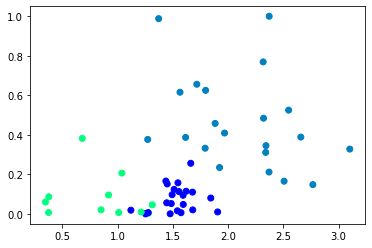

In [23]:
plt.scatter(df_MinMax_1['x'], df_MinMax_1['y'],
           c = GaussianMixture(n_components = 3).fit_predict(df_MinMax_1), cmap =plt.cm.winter, alpha = 11) 
plt.show() 

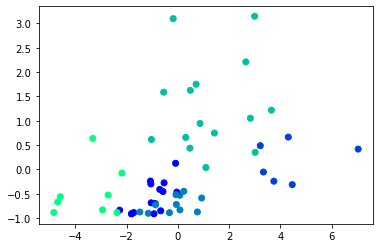

In [24]:
plt.scatter(df_Standard_1['x'], df_Standard_1['y'],
           c = GaussianMixture(n_components = 5).fit_predict(df_Standard_1), cmap =plt.cm.winter, alpha = 11) 

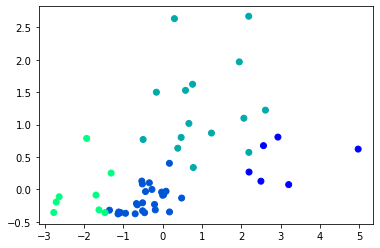

In [25]:
plt.scatter(df_robustScaled_1['x'], df_robustScaled_1['y'],
           c = GaussianMixture(n_components = 4).fit_predict(df_robustScaled_1), cmap =plt.cm.winter, alpha = 11) 

In [26]:
gmm = GaussianMixture(n_components=4, random_state=42)
MinMax_1_label = gmm.fit(df_MinMax_1).predict(df_MinMax_1)
MinMax_1_label

array([3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 0, 1,
       1, 3, 1, 2, 3, 0, 0, 1, 0, 1, 3, 2, 3, 3, 2, 0, 1, 0, 0, 3, 0, 1,
       1, 3, 2, 1, 3, 1, 0, 0, 0, 0, 1], dtype=int64)

In [27]:
gmm = GaussianMixture(n_components=5, random_state=42)
Standard_1_label = gmm.fit(df_Standard_1).predict(df_Standard_1)
Standard_1_label

array([1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 4, 3, 4, 4, 0, 3,
       3, 1, 3, 2, 1, 0, 0, 3, 4, 3, 1, 2, 4, 1, 2, 0, 3, 0, 0, 4, 0, 3,
       3, 1, 2, 4, 4, 4, 0, 0, 0, 4, 3], dtype=int64)

In [28]:
gmm = GaussianMixture(n_components=3, random_state=42)
robustScaled_1_label = gmm.fit(df_robustScaled_1).predict(df_robustScaled_1)
robustScaled_1_label

array([2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
cluster_1 = pd.Series(MinMax_1_label)
cluster_1

0     3
1     3
2     0
3     3
4     3
5     3
6     3
7     3
8     1
9     2
10    3
11    3
12    2
13    3
14    2
15    2
16    3
17    1
18    3
19    3
20    0
21    1
22    1
23    3
24    1
25    2
26    3
27    0
28    0
29    1
30    0
31    1
32    3
33    2
34    3
35    3
36    2
37    0
38    1
39    0
40    0
41    3
42    0
43    1
44    1
45    3
46    2
47    1
48    3
49    1
50    0
51    0
52    0
53    0
54    1
dtype: int64

In [30]:
cluster_2 = pd.Series(Standard_1_label)
cluster_2

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     3
9     2
10    1
11    1
12    2
13    1
14    2
15    2
16    4
17    3
18    4
19    4
20    0
21    3
22    3
23    1
24    3
25    2
26    1
27    0
28    0
29    3
30    4
31    3
32    1
33    2
34    4
35    1
36    2
37    0
38    3
39    0
40    0
41    4
42    0
43    3
44    3
45    1
46    2
47    4
48    4
49    4
50    0
51    0
52    0
53    4
54    3
dtype: int64

In [31]:
cluster_3 = pd.Series(robustScaled_1_label)
cluster_3

0     2
1     2
2     2
3     2
4     0
5     0
6     2
7     0
8     1
9     2
10    2
11    0
12    2
13    2
14    2
15    2
16    1
17    1
18    1
19    1
20    2
21    1
22    1
23    0
24    1
25    2
26    2
27    0
28    2
29    1
30    1
31    1
32    0
33    2
34    1
35    0
36    2
37    2
38    1
39    2
40    0
41    1
42    0
43    1
44    1
45    0
46    2
47    1
48    1
49    1
50    0
51    0
52    0
53    1
54    1
dtype: int64

In [32]:
MinMax_1 = pd.concat([final['address'],df_MinMax_1, cluster_1], axis=1)
MinMax_1 = MinMax_1.rename(columns={0: 'cluster'}).sort_values(by='cluster' ,ascending=False)
MinMax_1

,address,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area,x,y,cluster
0,마산합포구 현동,0.015736,0.52,0.954545,0.014457,0.052534,1.541536,0.015736,3
23,마산회원구 회원2동,0.157355,0.48,0.863636,0.065979,0.137033,1.546649,0.157355,3
45,마산회원구 봉암동,0.113208,0.48,1.000000,0.059758,0.015956,1.555715,0.113208,3
26,마산합포구 가포동,0.052337,0.52,0.954545,0.006389,0.005089,1.486023,0.052337,3
19,마산합포구 교방동,0.332361,0.48,0.863636,0.130589,0.318590,1.792815,0.332361,3
18,진해구 병암동,0.625084,0.22,0.954545,0.207288,0.414971,1.796804,0.625084,3
34,마산합포구 문화동,0.234783,0.48,0.954545,0.252480,0.235984,1.923009,0.234783,3
16,진해구 태백동,0.615686,0.22,0.954545,0.086695,0.303922,1.565162,0.615686,3
1,마산합포구 진전면,0.000000,0.30,0.954545,0.000000,0.000000,1.254545,0.000000,3
41,마산합포구 자산동,0.457755,0.48,0.863636,0.171723,0.367688,1.883047,0.457755,3


In [33]:
Standard_1 = pd.concat([final['address'],df_Standard_1, cluster_2], axis=1)
Standard_1 = Standard_1.rename(columns={0: 'cluster'}).sort_values(by='cluster' ,ascending=False)
Standard_1

,address,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area,x,y,cluster
16,진해구 태백동,1.586475,-1.173324,0.952794,-0.459363,0.123154,-0.556739,1.586475,4
53,마산회원구 합성2동,0.614795,-0.141433,-0.793995,0.426828,-0.525504,-1.034104,0.614795,4
49,마산회원구 구암2동,3.098922,-0.141433,-2.104088,1.396075,0.665043,-0.184402,3.098922,4
48,진해구 이동,0.747417,-1.173324,0.952794,1.216259,0.428572,1.424302,0.747417,4
47,마산회원구 양덕1동,1.750121,-0.141433,-0.793995,0.787238,0.858001,0.709811,1.750121,4
30,마산회원구 석전동,0.657741,-0.141433,-0.793995,0.682226,0.559013,0.305811,0.657741,4
34,마산합포구 문화동,0.038856,-0.141433,0.952794,0.408046,-0.127324,1.092083,0.038856,4
41,마산합포구 자산동,0.944796,-0.141433,0.661663,-0.014486,0.358250,0.863994,0.944796,4
19,마산합포구 교방동,0.435320,-0.141433,0.661663,-0.229703,0.177231,0.467759,0.435320,4
18,진해구 병암동,1.624658,-1.173324,0.952794,0.171595,0.532576,0.483642,1.624658,4


In [34]:
robustScaled_1 = pd.concat([final['address'],df_robustScaled_1, cluster_3], axis=1)
robustScaled_1 = robustScaled_1.rename(columns={0: 'cluster'}).sort_values(by='cluster' ,ascending=False)
robustScaled_1


,address,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area,x,y,cluster
0,마산합포구 현동,-0.330194,0.078430,0.166667,-0.324537,-0.427390,-0.506831,-0.330194,2
12,진해구 여좌동,-0.113406,-0.509805,-1.500000,-0.287004,-0.331703,-2.628512,-0.113406,2
28,의창구 동읍,-0.348561,0.784313,-1.000000,-0.362201,-0.536526,-1.114413,-0.348561,2
1,마산합포구 진전면,-0.378219,-0.352942,0.166667,-0.377773,-0.567944,-1.131992,-0.378219,2
26,마산합포구 가포동,-0.218486,0.078430,0.166667,-0.354246,-0.554329,-0.663479,-0.218486,2
25,마산회원구 합성1동,0.252341,0.000000,-0.833333,-0.120835,-0.352937,-1.307105,0.252341,2
36,마산회원구 회성동,-0.086830,0.000000,-0.833333,-0.353087,-0.505127,-1.691548,-0.086830,2
37,성산구 성주동,-0.315914,0.784313,-0.250000,-0.260632,-0.457873,-0.184192,-0.315914,2
20,의창구 대산면,-0.359463,0.784313,-0.333333,-0.358872,-0.547962,-0.455854,-0.359463,2
39,성산구 웅남동,-0.347740,0.784313,0.250000,-0.300923,-0.555614,0.177776,-0.347740,2


In [35]:
MinMax_1['address'].head(10)

0       마산합포구 현동
23    마산회원구 회원2동
45     마산회원구 봉암동
26     마산합포구 가포동
19     마산합포구 교방동
18       진해구 병암동
34     마산합포구 문화동
16       진해구 태백동
1      마산합포구 진전면
41     마산합포구 자산동
Name: address, dtype: object

In [36]:
Standard_1['address'].head(10)

16       진해구 태백동
53    마산회원구 합성2동
49    마산회원구 구암2동
48        진해구 이동
47    마산회원구 양덕1동
30     마산회원구 석전동
34     마산합포구 문화동
41     마산합포구 자산동
19     마산합포구 교방동
18       진해구 병암동
Name: address, dtype: object

In [37]:
robustScaled_1['address'].head(10)

0       마산합포구 현동
12       진해구 여좌동
28        의창구 동읍
1      마산합포구 진전면
26     마산합포구 가포동
25    마산회원구 합성1동
36     마산회원구 회성동
37       성산구 성주동
20       의창구 대산면
39       성산구 웅남동
Name: address, dtype: object

In [44]:
result = pd.concat([df1,MinMax_1['cluster']],axis=1)
result

,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area,cluster
0,4.205007,35.099998,23,42.515128,1.239300,3
1,0.556901,34.000000,23,0.101695,0.084618,3
2,1.292627,37.500000,7,31.810829,1.000228,0
3,4.942185,33.599998,21,18.904999,0.763345,3
4,13.589966,33.599998,23,171.009630,4.750404,3
5,29.287384,33.599998,23,342.303244,4.934346,3
6,2.128400,34.000000,23,12.364216,0.495697,3
7,35.715619,33.599998,23,118.643340,5.238739,3
8,34.915273,34.900002,23,1228.291322,20.172942,1
9,14.486825,33.599998,3,91.674071,1.208735,2


In [50]:
MinMax_1.query('cluster == 3')['address']

0       마산합포구 현동
23    마산회원구 회원2동
45     마산회원구 봉암동
26     마산합포구 가포동
19     마산합포구 교방동
18       진해구 병암동
34     마산합포구 문화동
16       진해구 태백동
1      마산합포구 진전면
41     마산합포구 자산동
13     마산합포구 구산면
11       진해구 경화동
10     마산합포구 진북면
35     마산합포구 완월동
48        진해구 이동
7        진해구 자은동
6      마산합포구 진동면
5        진해구 덕산동
4        진해구 풍호동
3        진해구 웅천동
32        진해구 석동
Name: address, dtype: object

In [52]:
MinMax_1.query('cluster == 2')['address']

36     마산회원구 회성동
25    마산회원구 합성1동
33     마산회원구 내서읍
46    마산회원구 구암1동
15      진해구 웅동2동
14      진해구 웅동1동
12       진해구 여좌동
9        진해구 충무동
Name: address, dtype: object

In [53]:
MinMax_1.query('cluster == 1')['address']

43        성산구 용지동
44        성산구 상남동
38        성산구 반송동
49     마산회원구 구암2동
47     마산회원구 양덕1동
54      마산합포구 산호동
31     마산회원구 회원1동
24      마산합포구 오동동
8       마산합포구 월영동
17     마산회원구 양덕2동
22    마산합포구 반월중앙동
21      마산합포구 합포동
29       성산구 가음정동
Name: address, dtype: object

In [54]:
MinMax_1.query('cluster == 0')['address']

28        의창구 동읍
42       의창구 팔룡동
40       성산구 사파동
39       성산구 웅남동
30     마산회원구 석전동
20       의창구 대산면
37       성산구 성주동
2         의창구 북면
50       성산구 중앙동
51       의창구 명곡동
52       의창구 봉림동
53    마산회원구 합성2동
27       의창구 의창동
Name: address, dtype: object

In [47]:
result.groupby('cluster').agg('mean').reset_index()

,cluster,traffic/area,max_temp,dust_naver,f_pop/area,young_old/area
0,0,23.626275,36.584617,12.307692,345.157178,3.066320
1,1,113.287536,35.515387,15.846154,1312.541906,15.126222
2,2,25.635749,34.112500,7.875000,111.300866,1.690698
3,3,43.687532,34.242857,22.666667,272.420242,3.888097
